# Pandas Basic 4


In [4]:
from IPython.display import Image

import pandas as pd
import numpy as np

# 4.Handling missing data

> 누락된 데이터 처리하기
- 판다스의 설계 목표 중 하나는 누락 데이터를 가능한한 쉽게 처리할 수 있도록 하는 것
- 판다스는 누락된 데이터를 실수든 아니든 NaN(Not a Number)으로 취급한다
- 그래서 누락된 값을 쉽게 찾을 수 있다.

In [5]:
string_data = pd.Series(['aardvark','artichoke',np.nan,'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [7]:
# null값이 있는지 확인
string_data.isnull()


0    False
1    False
2     True
3    False
dtype: bool

In [8]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

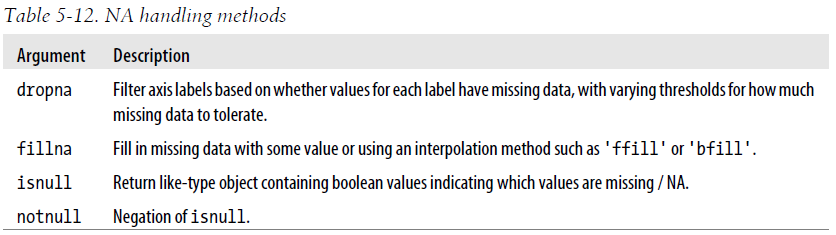

In [9]:
# Na 처리 메소드
Image('./images/table5_12.png')

## Filtering out missing data

> 누락된 데이터 골라내기
- Series에 대해 dropna메소드를 적용하면, 실제 데이터가 들어있는 색인값과 Series값으로 반환 한다

In [10]:
from numpy import nan as NA
data = pd.Series([1, NA, 2.5, NA, 7])
data

0    1.0
1    NaN
2    2.5
3    NaN
4    7.0
dtype: float64

In [13]:
data.dropna()  # 원본 데이터는 변하지 않음.


0    1.0
2    2.5
4    7.0
dtype: float64

In [14]:
data

0    1.0
1    NaN
2    2.5
3    NaN
4    7.0
dtype: float64

In [16]:
data[data.notnull()]  # 불린 인덱싱 사용

0    1.0
2    2.5
4    7.0
dtype: float64

In [18]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
cleaned = data.dropna()  # null값 모두 제거
cleaned

,0,1,2
0,1.0,6.5,3.0


In [21]:
# 모든 값이 Na인 값만 제외
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [22]:
data[4]=NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [25]:
# 행기준으로 모두 null값인 행 삭제
data.dropna(axis = 1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [27]:
df =pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,-0.705380,-0.800004,-2.131769
1,0.240928,-0.851818,0.945968
2,0.025951,-0.604153,-1.708587
3,0.611203,0.354440,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [28]:
df.iloc[:4,1] = NA
df.iloc[:2,2] = NA
df

,0,1,2
0,-0.705380,NaN,NaN
1,0.240928,NaN,NaN
2,0.025951,NaN,-1.708587
3,0.611203,NaN,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [29]:
# thresh: 몇 개 이상의 값이 들어있는 로우만 살펴보고 싶을 대 넣는 인자
df.dropna(thresh = 3)

,0,1,2
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [30]:
df.dropna(thresh = 2)

,0,1,2
2,0.025951,NaN,-1.708587
3,0.611203,NaN,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [31]:
df.dropna(thresh = 1)

,0,1,2
0,-0.705380,NaN,NaN
1,0.240928,NaN,NaN
2,0.025951,NaN,-1.708587
3,0.611203,NaN,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


## 4.2 Filling in missing data

> 누락된 값 채우기

In [32]:
df

,0,1,2
0,-0.705380,NaN,NaN
1,0.240928,NaN,NaN
2,0.025951,NaN,-1.708587
3,0.611203,NaN,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [34]:
df.fillna(0)  # nan 값을 0으로 채우기

,0,1,2
0,-0.705380,0.000000,0.000000
1,0.240928,0.000000,0.000000
2,0.025951,0.000000,-1.708587
3,0.611203,0.000000,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [37]:
# fillna에 dict값을 넣어서 컬럼별로 다른 값을 넣을 수도 있다.
df.fillna({1:0.5, 2: -1})  # 키: 컬럼명

,0,1,2
0,-0.705380,0.500000,-1.000000
1,0.240928,0.500000,-1.000000
2,0.025951,0.500000,-1.708587
3,0.611203,0.500000,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [38]:
# 원본 데이터에 저장
df.fillna(0, inplace = True)

In [39]:
df

,0,1,2
0,-0.705380,0.000000,0.000000
1,0.240928,0.000000,0.000000
2,0.025951,0.000000,-1.708587
3,0.611203,0.000000,-0.010463
4,-0.000982,1.457742,0.874533
5,-1.030266,-1.078227,-0.414667
6,0.171517,0.924674,-0.202500


In [41]:
df = pd.DataFrame(np.random.randn(6,3))
df

,0,1,2
0,-0.903133,-0.972028,-2.712105
1,-0.323390,-0.631580,2.617933
2,0.128453,-0.149892,-0.909175
3,2.491201,-1.467011,-1.881949
4,-0.731165,-0.538281,0.179826
5,0.741067,1.549966,-1.348185


In [42]:
df.iloc[2:,1]=NA
df.iloc[4:,2]=NA
df

,0,1,2
0,-0.903133,-0.972028,-2.712105
1,-0.323390,-0.631580,2.617933
2,0.128453,NaN,-0.909175
3,2.491201,NaN,-1.881949
4,-0.731165,NaN,NaN
5,0.741067,NaN,NaN


In [43]:
# Nan 값을 앞의 값으로 채우기
df.fillna(method = 'ffill')

,0,1,2
0,-0.903133,-0.972028,-2.712105
1,-0.323390,-0.631580,2.617933
2,0.128453,-0.631580,-0.909175
3,2.491201,-0.631580,-1.881949
4,-0.731165,-0.631580,-1.881949
5,0.741067,-0.631580,-1.881949


In [46]:
df.fillna(method = 'ffill', limit = 2) # 채울 값의 개수 지정

,0,1,2
0,-0.903133,-0.972028,-2.712105
1,-0.323390,-0.631580,2.617933
2,0.128453,-0.631580,-0.909175
3,2.491201,-0.631580,-1.881949
4,-0.731165,NaN,-1.881949
5,0.741067,NaN,-1.881949


In [48]:
# 컬럼의 평균값으로 채우기
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

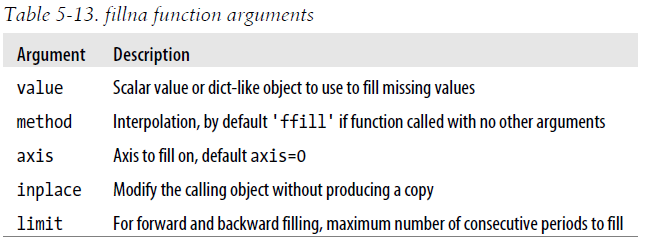

In [49]:
#fillna 함수 인자
Image('./images/table5_13.png')